In [1]:
require 'nn'
require 'clnn'
require 'optim'
require 'ffmpeg'
require 'image'
require 'csvigo'
require 'qtwidget'
h
src = image.load("wallpaper.jpg")

In [2]:
function extract_one(i)
    
    width = 128
    height = 128
    --print(src:size())
    x1 = torch.random(src:size()[3] - width)
    --print(x1)
    x2 = x1 + width
    --print(x2)
    y1 = torch.random(src:size()[2] - height)
    --print(y1)

    y2 = y1 + height
    --print(y2)
    i_c = image.crop(src, x1, y1, x2, y2)
    
    top_left = torch.Tensor({x1, y1})
    bottom_right = torch.Tensor({x1 + width, y1 + height})
    
    return i_c, x1, y1, width, height
end

In [3]:
function sleep(n)
  os.execute("sleep " .. tonumber(n))
end

In [4]:
function display_box(img, x1, y1, x2, y2, width, height)

    -- Display image and get handle
    win = qtwidget.newwindow(img:size(3), img:size(2))
    image.display{image = img, win = win}

    -- ground truth
    win:setcolor(1,0,0)
    win:rectangle(x1, y1, width, height)
    win:stroke()
    
    -- estimation
    win:setcolor(0,1,0)
    win:rectangle(x2, y2, width, height)
    win:stroke()
    
    return win
end



In [6]:
amount_pics = 1000

trainset = {
   data = torch.Tensor(amount_pics, 3, 128, 128),
   label = torch.DoubleTensor(amount_pics, 2),
   size = function() return amount_pics end
}


for i=1, amount_pics do
    i_c, x1, y1, width, height = extract_one(src)
    
    trainset.data[i] = i_c
    
    print(x1,y1, width,height)
    
    -- Remove width and height estimations for now
    --label = torch.Tensor({x1, y1, width, height})
    label = torch.Tensor({x1, y1})
    
    trainset.label[i] = label
    
end

48	177	128	128	


632	382	128	128	


469	508	128	128	
724	637	128	128	


383	547	128	128	
828	542	128	128	


480	431	128	128	


67	146	128	128	
371	141	128	128	


518	277	128	128	


94	583	128	128	
822	

345	128	128	
223	358	128	128	


711	243	128	128	
323	421	128	128	


471	312	128	128	


97	456	128	128	
182	506	128	128	


521	602	128	128	
795	476	128	128	


882	477	128	128	


848	221	128	128	
630	361	

128	128	
124	199	128	128	


403	408	128	128	
111	429	128	128	


53	84	128	128	


684	264	128	128	
487	98	128	128	


123	16	128	128	


473	498	128	128	
755	241	128	128	


235	317	128	128	


388	383	128	128	
399	120	128	128	


25	244	128	128	


855	613	128	128	
635	484	128	128	


568	76	128	128	
771	193	128	128	


180	616	128	128	


885	322	128	128	


521	152	128	128	
176	124	128	128	


230	130	128	128	
580	44	128	128	


427	447	128	128	


340	53	128	128	
597	442	128	128	


182	348	128	128	


39	33	128	128	
554	121	128	128	


842	485	128	128	


499	379	128	128	
692	359	128	128	


817	412	128	128	


380	563	128	128	
691	263	128	128	


889	529	128	128	


712	617	128	128	
602	579	128	128	


576	578	128	128	
287	134	128	128	


455	482	128	128	


680	438	128	128	
283	226	128	128	


801	108	128	128	


735	379	128	128	
87	571	128	128	


812	350	128	128	


811	504	128	128	
803	392	128	128	


467	168	128	128	


19	569	128	128	
690	64	128	128	


554	317	128	128	
547	335	128	128	


727	170	128	128	


351	390	128	128	
614	183	128	128	


772	565	128	128	
16	151	128	128	


272	378	128	128	


39	294	128	128	
495	598	128	128	


12	276	128	128	


769	261	128	128	
59	37	128	128	


38	412	128	128	
820	107	128	128	


311	419	128	128	


660	170	128	128	
748	626	128	128	


345	625	128	128	
601	8	128	128	


560	260	128	128	


2	47	128	128	
885	576	128	128	


404	526	128	128	


212	220	128	128	
354	1	128	128	


320	102	128	128	


240	613	128	128	
87	517	128	128	


491	472	128	128	


378	215	128	128	


430	592	128	128	


328	192	128	128	
94	125	128	128	


94	265	128	128	
588	230	128	128	


389	452	128	128	


438	178	128	128	


179	110	128	128	
70	49	128	128	


835	402	128	128	
661	267	128	128	


395	633	128	128	


256	335	128	128	
177	484	128	128	


771	526	128	128	


460	385	128	128	
26	348	128	128	


610	524	128	128	


96	209	128	128	
253	343	128	128	


856	603	128	128	
210	126	128	128	


849	252	128	128	


2	121	128	128	
724	279	128	128	


658	568	128	128	
681	147	128	128	


23	627	128	128	


803	176	128	128	
883	148	128	128	


161	337	128	128	
362	309	128	128	


200	400	128	128	


472	16	128	128	
893	439	128	128	


14	525	128	128	


146	365	128	128	
161	380	128	128	


424	153	128	128	


459	53	128	128	
400	548	128	128	


174	521	128	128	


488	562	128	128	
220	55	128	128	


292	606	128	128	


588	186	128	128	
350	367	128	128	


467	522	128	128	


432	442	128	128	
517	474	128	128	


282	172	128	128	


235	604	128	128	
320	18	128	128	


444	141	128	128	
174	248	128	128	


361	182	128	128	


258	638	128	128	
178	571	128	128	


577	64	128	128	


326	65	128	128	
350	396	128	128	


134	156	128	128	


819	107	128	128	
35	423	128	128	


630	588	128	128	
475	450	128	128	


492	66	128	128	


806	330	128	128	
732	511	128	128	


666	17	128	128	
629	427	128	128	


494	189	128	128	


886	393	128	128	
653	60	128	128	


553	288	128	128	
210	415	128	128	


597	355	128	128	


840	595	128	128	
706	139	128	128	


240	446	128	128	
515	472	128	128	


703	629	128	128	


222	416	128	128	
366	556	128	128	


242	128	128	128	


430	210	128	128	
814	369	128	128	


660	68	128	128	


794	451	128	128	
428	189	128	128	


446	6	128	128	


420	453	128	128	
563	351	128	128	


814	455	128	128	
239	173	128	128	


240	400	128	128	


462	184	128	128	


824	547	128	128	
134	584	128	128	


612	573	128	128	
595	183	128	128	


307	470	128	128	
847	553	128	128	


812	146	128	128	


72	427	128	128	
760	529	128	128	


110	29	128	128	


468	348	128	128	
226	73	128	128	


511	521	128	128	


321	118	128	128	
670	203	128	128	


618	185	128	128	
551	273	128	128	


92	571	128	128	
365	304	128	128	


732	221	128	128	
534	171	128	128	


424	316	128	128	


304	339	128	128	
376	34	128	128	


739	359	128	128	
263	601	128	128	


282	33	128	128	


797	265	128	128	
687	44	128	128	


123	321	128	128	
595	290	128	128	


890	353	128	128	
49	152	128	128	


568	126	128	128	
495	553	128	128	
175	304	128	128	


33	614	128	128	


488	595	128	128	


428	138	128	128	
127	295	128	128	


553	368	128	128	


336	373	128	128	
127	496	128	128	


43	18	128	128	
597	544	128	128	


327	520	128	128	


861	578	128	128	
168	217	128	128	


891	177	128	128	


238	326	128	128	
806	340	128	128	


702	258	128	128	


47	301	128	128	
494	261	128	128	


613	297	128	128	


522	203	128	128	
410	631	128	128	


363	298	128	128	
661	371	128	128	


686	231	128	128	


98	230	128	128	
579	301	128	128	


192	30	128	128	
771	621	128	128	


894	639	128	128	


693	121	128	128	
556	20	128	128	


720	97	128	128	
151	43	128	128	


186	32	128	128	


394	518	128	128	
41	284	128	128	


784	108	128	128	
746	123	128	128	


573	614	128	128	
59	236	

128	128	
88	189	128	128	


144	368	128	128	
233	233	128	128	


888	477	128	128	
376	54	128	128	


186	199	128	128	


493	218	128	128	
675	493	128	128	


597	394	128	128	
361	224	128	128	


591	177	128	128	


853	79	128	128	
526	359	128	128	


514	431	128	128	
670	283	128	128	


456	71	128	128	
55	221	128	128	


349	314	128	128	
764	457	128	128	


763	14	128	128	


423	431	128	128	
127	375	128	128	
323	65	128	128	


217	536	128	128	
275	534	128	128	
140	419	128	128	
895	

397	128	128	
550	252	128	128	
565	

499	128	128	
843	599	128	128	


703	587	128	128	
330	157	128	128	


318	461	128	128	


822	270	128	128	
616	16	128	128	


859	578	128	128	
698	153	128	128	


506	72	128	128	


16	462	128	128	
302	510	128	128	


71	373	128	128	
150	496	128	128	


322	374	128	128	
482	311	128	128	


276	406	128	128	


143	347	128	128	
892	101	128	128	


76	87	128	128	


449	434	128	128	
256	167	128	128	
596	620	128	128	
340	405	128	128	


415	367	128	128	


159	168	128	128	
422	132	128	128	


120	58	128	128	


135	347	128	128	
279	592	128	128	


3	76	128	128	
43	378	128	128	


268	427	128	128	


887	574	128	128	
606	162	128	128	


116	125	128	128	
407	127	128	128	


892	270	128	128	


159	335	128	128	
653	179	128	128	


770	102	128	128	
541	216	128	128	


394	473	128	128	


469	305	128	128	


282	164	128	128	
114	507	128	128	


676	429	128	128	
868	96	128	128	


521	325	128	128	
249	78	128	128	


116	151	128	128	


648	255	128	128	
592	13	128	128	


40	33	128	128	
308	318	128	128	


558	628	128	128	


204	120	128	128	
605	29	128	128	


455	441	128	128	
563	178	128	128	


491	392	128	128	


342	632	128	128	
199	503	128	128	


890	114	128	128	


893	449	128	128	
796	149	128	128	


132	42	128	128	


429	527	128	128	
326	200	128	128	


528	544	128	128	
76	3	128	128	


547	572	128	128	


528	308	128	128	
56	263	128	128	


754	378	128	128	
314	199	128	128	


638	198	128	128	


842	216	128	128	
516	457	128	128	


613	484	128	128	


391	344	128	128	
284	7	128	128	


229	527	128	128	
860	183	128	128	


348	214	128	128	


743	131	128	128	
793	404	128	128	


826	486	128	128	
828	84	128	128	


391	618	128	128	


415	292	128	128	
510	405	128	128	


637	136	128	128	
726	262	128	128	


493	496	128	128	


645	628	128	128	
600	612	128	128	


496	147	128	128	
138	146	128	128	


299	351	128	128	


187	600	128	128	
285	215	128	128	


707	563	128	128	
711	50	128	128	


609	51	128	128	


623	579	128	128	
875	430	128	128	


677	392	128	128	
339	154	128	128	


675	464	128	128	


739	50	128	128	
7	98	128	128	


342	29	128	128	
46	86	128	128	


791	101	128	128	


14	125	128	128	
869	42	128	128	


428	124	128	128	
691	119	128	128	


671	22	128	128	


591	261	128	128	
509	347	128	128	


619	348	128	128	
337	431	128	128	


725	97	128	128	
311	355	128	128	


842	317	128	128	


209	465	128	128	
8	418	128	128	


697	586	128	128	
864	536	128	128	


640	368	128	128	
58	68	128	128	


818	265	128	128	


698	152	128	128	
482	499	128	128	


478	187	128	128	


460	406	128	128	
151	638	128	128	


426	267	128	128	


150	602	128	128	
317	563	128	128	


344	458	128	128	


15	217	128	128	
700	484	128	128	


373	638	128	128	
16	507	128	128	


684	619	128	128	


270	14	128	128	
63	432	128	128	


74	592	128	128	
22	202	128	128	


601	220	128	128	
364	378	128	128	


570	590	128	128	


201	278	128	128	
47	33	128	128	


564	130	128	128	
219	121	128	128	


530	421	128	128	
140	607	128	128	


259	58	128	128	
775	617	128	128	


39	164	128	128	


104	440	128	128	
565	347	128	128	


723	624	128	128	
752	53	128	128	


9	43	128	128	


637	546	128	128	
157	331	128	128	


582	180	128	128	
312	531	128	128	


159	633	128	128	
782	397	128	128	


450	133	128	128	


28	339	128	128	
333	638	128	128	


524	270	128	128	


487	577	128	128	
288	41	128	128	


416	432	128	128	


433	381	128	128	
659	61	128	128	


688	77	128	128	


811	480	128	128	
888	424	128	128	


73	97	128	128	
803	148	128	128	


251	238	128	128	


635	525	128	128	
42	406	128	128	


146	338	128	128	


887	172	128	128	
317	409	128	128	


580	410	128	128	
787	272	128	128	


785	560	128	128	


445	357	128	128	
749	52	128	128	


559	547	128	128	
748	97	128	128	


535	181	128	128	


313	130	128	128	
358	379	128	128	


688	128	128	128	


202	275	128	128	
787	579	128	128	


730	330	128	128	
30	248	128	128	


208	112	128	128	
201	298	128	128	


805	387	128	128	


255	435	128	128	
161	457	128	128	


743	197	128	128	
231	375	128	128	


730	276	128	128	


408	376	128	128	
470	60	128	128	


86	434	128	128	
669	

229	128	128	
288	394	128	128	


85	292	128	128	
611	636	128	128	


802	478	128	128	


301	433	128	128	
515	293	128	128	


315	380	128	128	


91	367	128	128	
183	302	128	128	


84	164	128	128	
223	294	128	128	


226	288	128	128	


836	202	128	128	
328	106	128	128	


728	296	128	128	
406	409	128	128	


622	613	128	128	


593	15	128	128	
591	633	128	128	


363	559	128	128	


419	362	128	128	
94	378	128	128	


304	122	128	128	


50	194	128	128	
120	541	128	128	


786	200	128	128	


379	390	128	128	


798	61	128	128	
760	616	128	128	


272	213	128	128	
709	543	128	128	


224	275	128	128	
146	40	128	128	


670	455	128	128	
158	636	128	128	


424	115	128	128	


261	412	128	128	
799	364	128	128	


229	397	128	128	
320	335	128	128	


764	639	128	128	


360	306	128	128	
278	143	128	128	


35	501	128	128	
518	262	128	128	


80	432	128	128	
223	71	128	128	


818	415	128	128	


587	18	128	128	
672	555	128	128	


768	542	128	128	
788	627	128	128	


187	432	128	128	


40	556	128	128	
724	56	128	128	


556	58	128	128	
857	310	128	

128	
74	127	128	128	


848	357	128	128	
135	144	128	128	


265	416	128	128	
192	

372	128	128	
102	428	128	128	


634	59	128	128	
212	624	128	128	


846	635	128	128	


806	617	128	128	
709	207	128	128	


250	426	128	128	
546	142	128	128	


241	316	128	128	


844	304	128	128	
752	75	128	128	


331	179	128	128	


563	380	128	128	
772	528	128	128	


6	75	128	128	
733	47	128	128	


858	244	128	128	
751	472	128	128	


194	269	128	128	


662	200	128	128	


530	594	128	128	
329	492	128	128	


81	400	128	128	


500	51	128	128	
105	435	128	128	


473	538	128	128	


614	267	128	128	
97	406	128	128	


192	343	128	128	


122	199	128	128	
332	117	128	128	
164	282	128	128	
127	634	128	128	


368	95	128	128	


94	513	128	128	
437	306	128	128	


288	535	128	128	
192	43	

128	128	
186	359	128	128	


478	38	128	128	


425	125	128	128	
543	602	128	128	


674	507	128	128	


589	502	128	128	
845	580	128	128	


155	343	128	128	


498	90	128	128	
755	284	128	128	


508	332	128	128	
309	634	128	128	


112	116	128	128	


523	491	128	128	
216	562	128	128	


221	393	128	128	
892	576	128	128	


769	632	128	128	
87	408	128	128	


107	284	128	128	
6	596	128	128	


93	286	128	128	


63	184	128	128	


610	484	128	128	


509	5	128	128	


580	257	128	128	


654	284	128	128	


367	426	128	128	


394	410	128	128	


310	425	128	128	


487	469	128	128	


737	614	128	128	


610	450	128	128	


425	310	128	128	


385	37	128	128	


506	402	128	128	


496	267	128	128	


278	496	128	128	


95	223	128	128	


3	435	128	128	


312	633	128	128	


107	275	128	128	


533	370	128	128	


409	130	128	128	


269	509	128	128	


688	417	128	128	


574	544	128	128	


447	57	128	128	


181	139	128	128	


674	49	128	128	


326	63	128	128	
192	503	

128	128	
352	590	

128	128	


434	213	128	128	


131	69	128	128	


163	248	128	128	
676	236	

128	128	
147	330	

128	128	
487	409	

128	128	


440	616	128	128	


102	266	128	128	


703	606	128	128	


502	377	128	128	
677	583	

128	128	
328	86	

128	128	


325	511	128	128	


351	533	128	128	


65	471	128	128	
173	375	

128	128	
204	54	128	128	


120	288	

128	128	
672	32	128	128	


112	247	128	128	


325	572	128	128	


664	251	128	128	


894	549	128	128	


137	460	128	128	


74	543	128	128	


45	442	128	128	


39	540	128	128	
245	598	128	128	


528	49	128	128	


361	376	128	128	


702	516	128	128	


796	373	128	128	
97	6	128	128	


155	295	128	128	


311	285	128	128	
711	544	128	128	


547	536	128	128	


496	146	128	128	
446	420	128	128	


684	387	128	128	


771	54	128	128	
307	541	128	128	


307	92	128	128	


834	591	128	128	
704	576	128	128	


238	1	128	128	
508	221	128	128	


326	148	128	128	
147	136	128	

128	
135	371	128	128	


644	526	128	128	
544	497	128	128	


317	594	128	128	
206	514	128	128	


533	187	128	128	
500	431	128	128	


576	107	128	128	


434	277	128	128	
430	96	128	128	


486	349	128	128	


784	577	128	128	
603	205	128	128	


630	305	128	128	
392	521	128	128	


593	370	128	128	


114	536	128	128	
107	184	128	128	


707	9	128	128	
266	367	128	128	


224	339	128	128	
628	278	128	128	


144	21	128	128	


556	285	128	128	
879	15	128	128	


311	403	128	128	
710	596	128	128	


45	49	128	128	


54	580	128	128	
40	348	128	128	


75	455	128	128	


286	127	128	128	
649	511	128	128	


285	590	128	128	
583	634	128	128	


224	365	128	128	


78	28	128	128	
441	32	128	128	


626	106	128	128	
553	212	128	128	


817	86	128	128	


815	248	128	128	
238	262	128	128	


134	255	128	128	


600	365	128	128	
679	371	128	128	


149	149	128	128	
226	440	128	128	


338	557	128	128	


286	590	128	128	
826	570	128	128	


804	493	128	128	


425	95	128	128	
377	184	128	128	


619	427	128	128	


600	194	128	128	
74	237	128	128	


680	140	128	128	


832	9	128	128	
204	117	128	128	


140	479	128	128	
605	238	128	128	


421	366	128	128	


745	579	128	128	
721	614	128	128	


497	182	128	128	


479	157	128	128	
588	44	128	128	


543	231	128	128	


299	344	128	128	
451	234	128	128	


181	568	128	128	


587	106	128	128	
458	151	128	128	


158	163	128	128	


256	208	128	128	
657	336	128	128	


608	409	128	128	
116	331	128	128	


561	175	128	128	
586	521	128	128	


111	639	128	128	
110	342	128	128	


711	572	128	128	


866	308	128	128	
249	136	128	128	


473	262	128	128	


512	47	128	128	
367	482	128	128	


625	562	128	128	
531	554	128	128	


14	315	128	128	
471	541	128	128	


245	91	128	128	
719	627	128	128	


399	76	128	128	


732	221	128	128	
776	228	128	128	


310	393	128	128	
314	389	128	128	


681	122	128	128	


383	166	128	128	
447	574	128	128	


295	212	128	128	


437	392	128	128	
700	173	128	128	


673	458	128	128	


291	244	128	128	
838	223	128	128	


196	244	128	128	
251	201	128	128	


725	618	128	128	


99	469	128	128	
397	63	128	128	


724	352	128	128	
39	244	128	128	


173	2	128	128	
164	511	128	128	


816	564	128	128	


747	223	128	128	
665	529	128	128	


483	184	128	128	
560	97	

128	128	
19	107	128	128	


737	616	128	128	
402	222	128	128	


654	470	128	128	


787	20	128	128	
729	621	128	128	


62	616	128	128	
43	474	128	128	


702	581	128	128	


223	181	128	128	
870	539	128	128	


340	18	128	128	


873	215	128	128	
529	159	128	128	


246	80	128	128	
798	184	128	128	


723	248	128	128	


86	430	128	128	
257	292	128	128	


632	496	128	128	


836	633	128	128	
555	425	128	128	


1	188	128	128	
133	131	128	128	


670	560	128	128	
115	159	128	128	


806	568	128	128	


665	151	128	128	
649	1	128	128	


169	601	128	128	


462	504	128	128	
552	141	128	128	


602	392	128	128	
753	534	128	128	


293	14	128	128	


235	170	128	128	
545	157	128	128	


451	429	128	128	


595	351	128	128	
643	568	128	128	


504	187	128	128	
806	118	128	128	


607	20	128	128	


170	360	128	128	
465	409	128	128	


557	108	128	128	


855	71	128	128	
769	353	128	128	
885	234	128	128	
15	568	128	128	


135	517	128	128	
144	168	128	128	


26	345	128	128	


437	555	128	128	
892	248	128	128	


491	565	128	128	
732	424	128	128	


621	468	128	128	
184	635	128	128	


408	517	128	128	


698	34	128	128	
586	167	128	128	


440	506	128	128	


755	126	128	128	
340	501	128	128	


383	528	128	128	


504	209	128	128	
412	523	128	128	


739	203	128	128	


473	331	128	128	
793	96	128	128	


618	619	128	128	
699	120	128	128	


628	543	128	128	


40	321	128	128	
192	53	128	128	


262	13	128	128	
358	531	128	128	


591	171	128	128	


852	462	128	128	


595	239	128	128	
127	295	128	128	


250	391	128	128	
627	590	128	128	


809	70	128	128	


328	371	128	128	
24	45	128	128	


39	299	128	128	
814	55	128	128	


836	321	128	128	


524	27	128	128	
818	114	128	128	


596	74	128	128	


397	144	128	128	
229	121	128	128	


445	533	128	128	


459	7	128	128	
272	64	128	128	


629	262	128	128	
497	25	128	128	


66	305	128	128	


316	175	128	128	
219	110	128	128	


183	330	128	128	
100	4	128	128	


158	497	128	128	


5	420	128	128	
794	576	128	128	


749	60	128	128	
744	36	128	128	


869	97	128	128	


576	81	128	128	
837	117	128	128	


853	109	128	128	


26	279	128	128	
455	178	128	128	


657	332	128	128	


251	99	128	128	
520	152	128	128	


41	302	128	128	
713	330	128	128	


881	512	128	128	


538	492	128	128	
432	527	128	128	


54	638	128	128	
732	62	128	128	


707	209	128	128	


528	132	128	128	
179	592	128	128	


127	389	128	128	
633	314	128	128	


499	288	128	128	


890	603	128	128	


401	186	128	128	
335	79	128	128	


473	541	128	128	


196	297	128	128	
893	421	

128	128	
123	351	128	128	


832	315	128	128	


204	404	128	128	
721	639	128	128	


617	81	128	128	
694	452	128	128	


477	229	128	128	


620	31	128	128	


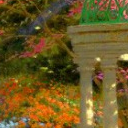

In [8]:
itorch.image(trainset.data[999])

In [9]:
mean = {} -- store the mean, to normalize the test set in the future
stdv  = {} -- store the standard-deviation for the future
for i=1,3 do -- over each image channel
    mean[i] = trainset.data[{ {}, {i}, {}, {}  }]:mean() -- mean estimation
    print('Channel ' .. i .. ', Mean: ' .. mean[i])
    trainset.data[{ {}, {i}, {}, {}  }]:add(-mean[i]) -- mean subtraction
    
    stdv[i] = trainset.data[{ {}, {i}, {}, {}  }]:std() -- std estimation
    print('Channel ' .. i .. ', Standard Deviation: ' .. stdv[i])
    trainset.data[{ {}, {i}, {}, {}  }]:div(stdv[i]) -- std scaling
end

Channel 1, Mean: 0.49366693708023	


Channel 1, Standard Deviation: 0.20173112300745	


Channel 2, Mean: 0.45630751271002	


Channel 2, Standard Deviation: 0.18586883354334	


Channel 3, Mean: 0.25747214098716	


Channel 3, Standard Deviation: 0.19075414311668	


In [10]:
mean_target = torch.DoubleTensor(2) -- store the mean, to normalize the test set in the future
stdv_target  = torch.DoubleTensor(2) -- store the standard-deviation for the future


for i=1, 2 do -- over x, y, height, width
    mean_target[i] = trainset.label[{{}, {i}}]:mean() -- mean estimation
    print('Channel ' .. i .. ', Mean: ' .. mean_target[i])
    trainset.label[{{}, {i}}]:add(- mean_target[i]) -- mean subtraction
    
    stdv_target[i] = trainset.label[{{}, {i}}]:std() -- std estimation
    print('Channel ' .. i .. ', Standard Deviation: ' .. stdv_target[i])
    trainset.label[{{}, {i}}]:div(stdv_target[i]) -- std scaling
end

Channel 1, Mean: 447.995	
Channel 1, Standard Deviation: 256.66509296152	
Channel 2, Mean: 320.625	
Channel 2, Standard Deviation: 186.3543246327	


In [11]:
function trainset:size() 
    return self.data:size(1) 
end


In [12]:
setmetatable(trainset, 
    {__index = function(t, i) 
                    return {t.data[i], t.label[i]} 
                end}
);

trainset.data = trainset.data:double() -- convert the data from a ByteTensor to a DoubleTensor.

In [13]:
function trainset:size() 
    return self.data:size(1) 
end

In [14]:
net = nn.Sequential()
net:add(nn.SpatialConvolution(3, 6, 5, 5)) -- 3 input image channels, 6 output channels, 5x5 convolution kernel
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*29*29))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*29*29, 2))             -- fully connected layer (matrix multiplication between input and weights)
-- net:add(nn.Linear(120, 2))
--net:add(nn.Linear(84, amount_pics))                   -- 10 is the number of outputs of the network (in this case, 10 digits)
--net:add(nn.LogSoftMax())                     -- converts the output to a log-probability. Useful for classification problems
-- net:add(nn.Linear(84, 2))                   -- 10 is the number of outputs of the network (in this case, 10 digits)

In [15]:
criterion = nn.MSECriterion()

In [16]:
-- criterion = nn.ClassNLLCriterion()

# Move to OpenCL

In [17]:
net = net:cl()
criterion = criterion:cl()
trainset.data = trainset.data:cl()
trainset.label = trainset.label:cl()
mean_target = mean_target:cl()
stdv_target = stdv_target:cl()

Using NVIDIA Corporation , OpenCL platform: NVIDIA CUDA
Using OpenCL device: GeForce 210


In [18]:
trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 40

In [19]:
trainer:train(trainset)

# StochasticGradient: training	


# current error = 0.71332768383552	


# current error = 0.47650921289471	


# current error = 0.36204437798244	


# current error = 0.26453461778618	


# current error = 0.18348001490347	


# current error = 0.12251755311963	


# current error = 0.083145821603095	


# current error = 0.059514294217872	


# current error = 0.044719685902262	


# current error = 0.035569747800542	


# current error = 0.030185131573423	


# current error = 0.024767369848896	


# current error = 0.021381879556256	


# current error = 0.018679167108245	


# current error = 0.016406048704634	


# current error = 0.014426674471643	


# current error = 0.012749599866911	


# current error = 0.011460488763063	


# current error = 0.010104442541859	


# current error = 0.0089180082175997	


# current error = 0.0075264451305697	


# current error = 0.0064163419697335	


# current error = 0.0052312934465202	


# current error = 0.0046342729887747	


# current error = 0.0039616500511033	


# current error = 0.0035001212508823	


# current error = 0.0030962308947187	


# current error = 0.00275199838807	


# current error = 0.0024073572271895	


# current error = 0.0021330632128811	


# current error = 0.0019496559888782	


# current error = 0.0017160441139356	


# current error = 0.0015889014771095	


# current error = 0.001469294728009	


# current error = 0.0013660151197949	


# current error = 0.0012853265705038	


# current error = 0.001205549183705	


# current error = 0.0011417509426396	


# current error = 0.0010770305440844	


# current error = 0.0010152093084974	
# StochasticGradient: you have reached the maximum number of iterations	
# training error = 0.0010152093084974	



In [20]:
print(net:forward(trainset.data[3]))
print(trainset.label[3])


 0.1261
 1.1640
[torch.ClTensor of size 2]

 0.0818
 1.0055
[torch.ClTensor of size 2]



In [21]:
function normalized_to_raw(pred, mean_target, stdv_target)
    
    val = pred:clone()
    val = val:cmul(stdv_target)
    val = val:add(mean_target)
    
    return val 
end

In [22]:
function raw_to_normalized(pred, mean_target, stdv_target)
    
    val = pred:clone()
    val = val:add(- mean_target)
    val = val:cdiv(stdv_target)
    
    return val 
end

In [23]:
print(normalized_to_raw(net:forward(trainset.data[10]), mean_target, stdv_target))
print(normalized_to_raw(trainset.label[10], mean_target, stdv_target))

 504.7537
 288.5578
[torch.ClTensor of size 2]

 518
 277
[torch.ClTensor of size 2]



# Testing

In [24]:
for i=1, 10 do
    
    -- Ground truth
    i_c, x1, y1, width, height = extract_one(src)
    
    -- Estimation
    pred = net:forward(i_c:cl())
    pred = normalized_to_raw(pred, mean_target, stdv_target)
    
    win = display_box(src, x1, x2, pred[1], pred[2], 128, 128)
    sleep(1.5)
    win:close()
end

In [38]:
for i=1, 10 do
    i_c, x1, y1, width, height = extract_one(src)

    print(normalized_to_raw(net:forward(i_c:cl()), mean_target, stdv_target))
        
    label = torch.Tensor({x1, y1})        
        
    print(label)
        
end

 501.2406
 352.0243
[torch.ClTensor of size 2]

 311
 589
[torch.DoubleTensor of size 2]



 475.9674
 325.6743
[torch.ClTensor of size 2]

 889
 193
[torch.DoubleTensor of size 2]



 488.5435
 361.5363
[torch.ClTensor of size 2]

 698
 590
[torch.DoubleTensor of size 2]



 464.0669
 300.1773
[torch.ClTensor of size 2]

  62
 108
[torch.DoubleTensor of size 2]



 461.6356
 342.7089
[torch.ClTensor of size 2]

 883
 628
[torch.DoubleTensor of size 2]



 449.6614
 344.9432
[torch.ClTensor of size 2]

 484
 274
[torch.DoubleTensor of size 2]



 464.2625
 345.3701
[torch.ClTensor of size 2]

 635
 584
[torch.DoubleTensor of size 2]



 463.7942
 308.2671
[torch.ClTensor of size 2]

 648
 329
[torch.DoubleTensor of size 2]



 435.6935
 274.3646
[torch.ClTensor of size 2]

 615
  18
[torch.DoubleTensor of size 2]



 421.1984
 372.7237
[torch.ClTensor of size 2]

 396
 421
[torch.DoubleTensor of size 2]



In [25]:
for i=6, 15  do

    local pred = normalized_to_raw(net:forward(trainset.data[i]), mean_target, stdv_target)
    local truth = normalized_to_raw(trainset.label[i], mean_target, stdv_target)
    
    win = display_box(src, truth[1], truth[2], pred[1], pred[2], 128, 128)
    sleep(1.5)
    win:close()
        
end

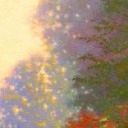

 0.0071
 0.0883
 0.9021
 0.0023
 0.0000
[torch.DoubleTensor of size 5]



In [247]:
i_test = image.load("3.png")
itorch.image(i_test)
print(net:forward(i_test):exp())

In [160]:
itorch.image(net[1])

/home/pold/torch/install/share/lua/5.1/itorch/gfx.lua:49: unhandled type in itorch.image:nil
stack traceback:
	[C]: in function 'error'
	/home/pold/torch/install/share/lua/5.1/itorch/gfx.lua:49: in function 'f'
	[string "local f = function() return itorch.image(net[..."]:1: in main chunk
	[C]: in function 'xpcall'
	/home/pold/torch/install/share/lua/5.1/itorch/main.lua:179: in function </home/pold/torch/install/share/lua/5.1/itorch/main.lua:143>
	/home/pold/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	/home/pold/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	/home/pold/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	/home/pold/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/home/pold/torch/install/share/lua/5.1/itorch/main.lua:350: in main chunk
	[C]: in function 'require'
	[string "arg={'/run/user/1000/jupyter/kernel-01cc1f3c-..."]:1: in main chunk: 

In [189]:
itorch.image(net:get(1).weight)
itorch.image(net:get(8).weight)

In [206]:
image.display{image=net:get(7).weight, zoom=3,pad=10}

{
  image : DoubleTensor - size: 84x120
  painter : qt.QtLuaPainter (0x08e18f08)
  window : qt.QWidget (0x08e18910)
  isclosure : true
  refresh : function: 0xa7553748
}


In [248]:
m1 = net.modules[1]
--image.display(m1.weight:view(m1.nOutputPlane, m1.nInputPlane, m1.kH, m1.kW), {zoom = 10, legend = ''})
-- monochrome filters:
image.display{image=m1.weight:view(m1.nOutputPlane *  m1.nInputPlane, m1.kH, m1.kW), zoom = 10}